In [1]:
import pandas as pd
import numpy as np

In [2]:
# chargement des données sous forme de dataframe
df_cat = pd.read_csv('data/Catalogue_type.csv')
df_imt = pd.read_csv('../../Donnees_Propres/Immatriculations.csv')
df_cl3 = pd.read_csv('data/Clients_3.csv')
df_cl11 = pd.read_csv('data/Clients_11.csv')

print ('dim catalogue: ', df_cat.shape) 
print ('dim immatriculation: ', df_imt.shape) 
print ('dim clients_3: ', df_cl3.shape) 
print ('dim clients_11: ', df_cl11.shape)


dim catalogue:  (270, 10)
dim immatriculation:  (2000000, 10)
dim clients_3:  (100000, 7)
dim clients_11:  (100000, 7)


In [3]:
# test des duplications de lignes
print ('catalogue: ', df_cat[df_cat.duplicated()].shape[0], ' duplication(s)')
print ('immatriculation: ', df_imt[df_imt['immatriculation'].duplicated()].shape[0], ' duplication(s)')
print ('client3: ',df_cl3[df_cl3.duplicated()].shape[0], ' duplication(s)') 
print ('client11: ',df_cl11[df_cl11.duplicated()].shape[0], ' duplication(s)')

catalogue:  0  duplication(s)
immatriculation:  3368  duplication(s)
client3:  0  duplication(s)
client11:  0  duplication(s)


In [4]:
# suppresion des duplications d'immatriculation
df_imt = df_imt.drop_duplicates(subset="immatriculation")
print ('immatriculation: ', df_imt[df_imt.duplicated()].shape[0], ' duplication(s)')
print ('immatriculation taille: ', df_imt.shape[0])


immatriculation:  0  duplication(s)
immatriculation taille:  1996632


In [5]:
# on définit df_clients la concatenation de clients_3 et clients_11
df_clients = pd.concat([df_cl11, df_cl3])
print ('taille clients: ', df_clients.shape[0]) 
print ('clients: ', df_clients[df_clients['immatriculation'].duplicated()].shape[0], ' duplication(s)')

taille clients:  200000
clients:  39  duplication(s)


In [6]:
# test duplication immatriculation
dup = df_clients[df_clients['immatriculation'].duplicated()].shape[0]
print ('Nombre duplications: ', dup) 

# suppression des duplications
df_clients = df_clients.drop_duplicates(subset='immatriculation')
dup = df_clients[df_clients['immatriculation'].duplicated()].shape[0]
print ('Nombre duplications après supression des duplications: ', dup)
print ('taille clients: ', df_clients.shape[0])

Nombre duplications:  39
Nombre duplications après supression des duplications:  0
taille clients:  199961


En Couple      0.643058
Celibataire    0.349673
Marie          0.006721
Divorce        0.000547
Name: situationFamiliale, dtype: float64

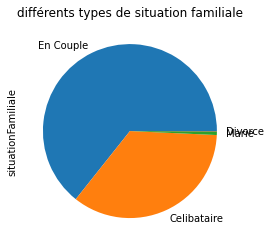

In [7]:
# Visualisation des différents types de situation familiale

df_clients["situationFamiliale"].value_counts(normalize=True).plot(kind='pie', title='différents types de situation familiale')

df_clients["situationFamiliale"].value_counts(normalize=True)

<AxesSubplot:title={'center':'Proportion du type de voitures achetés'}, ylabel='situationFamiliale'>

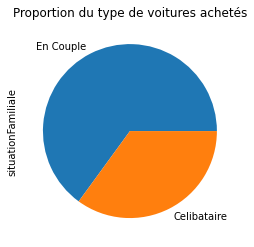

In [8]:
# On enlève les situations Marié et Divorcé de situation familiale pour simplifier le modèl

def apply_situationFamiliale(x):
    if (x == 'Divorce'):
        return 'Celibataire'
    if (x == 'Marie'):
        return 'En Couple'
    return x

df_clients['situationFamiliale'] = df_clients['situationFamiliale'].apply(apply_situationFamiliale)
df_clients["situationFamiliale"].value_counts(normalize=True).plot(kind='pie', title='Proportion du type de voitures achetés')

In [9]:
# ajout de la colonne type dans immatriculation

df_imt_type = pd.merge(df_imt,df_cat[['marque','nom','puissance','longueur','nbPlaces', 'couleur','prix', 'Type']], on=['marque','nom','puissance','couleur','longueur','prix','nbPlaces'])
df_imt_type

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Type
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Berline 5 portes
1,446 MZ 84,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Berline 5 portes
2,358 HU 25,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Berline 5 portes
3,2969 GM 41,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Berline 5 portes
4,968 TE 27,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Berline 5 portes
...,...,...,...,...,...,...,...,...,...,...,...
1996627,9272 VO 17,Volkswagen,New Beatle 1.8,110,moyenne,5,5,noir,True,18641,Berline 5 portes
1996628,8250 DU 83,Volkswagen,New Beatle 1.8,110,moyenne,5,5,noir,True,18641,Berline 5 portes
1996629,7483 EN 42,Volkswagen,New Beatle 1.8,110,moyenne,5,5,noir,True,18641,Berline 5 portes
1996630,3808 LJ 91,Volkswagen,New Beatle 1.8,110,moyenne,5,5,noir,True,18641,Berline 5 portes


In [10]:
df_cat_MNP = df_cat[['marque','nom','puissance', 'nbPlaces', 'Type']].drop_duplicates()
df_cat_MNP.to_csv('new_data/Cat_unique.csv', index=False)
df_cat_MNP

,marque,nom,puissance,nbPlaces,Type
0,Volvo,S80 T6,272,5,berline 5 portes
10,Volkswagen,Touran 2.0 FSI,150,7,Monospaces
20,Volkswagen,Polo 1.2 6V,55,5,Berline 3 portes
30,Volkswagen,New Beatle 1.8,110,5,Berline 3 portes
31,Volkswagen,New Beatle 1.8,110,5,Berline 5 portes
40,Volkswagen,Golf 2.0 FSI,150,5,Berline 5 portes
50,Skoda,Superb 2.8 V6,193,5,Berline 5 portes
55,Seat,Toledo 1.6,102,5,Berline 5 portes
60,Saab,9.3 1.8T,150,5,Berline 5 portes
70,Renault,Vel Satis 3.5 V6,245,5,Berline 5 portes


Visualisation du type de voiture acheté

Berline 5 portes : 1182791 = 59.24 %
berline 5 portes : 123615 = 6.19 %
Monospaces : 96037 = 4.81 %
Sport : 308151 = 15.43 %
Berline 3 portes : 97691 = 4.89 %
Citadines : 70810 = 3.55 %
Limousine : 103583 = 5.19 %
Break : 13954 = 0.70 %


<AxesSubplot:title={'center':'Proportion du type de voitures achetés'}, ylabel='Type'>

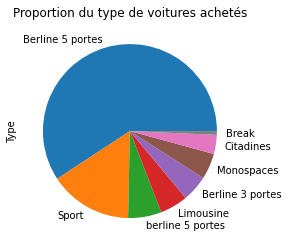

In [11]:
# Test visualisation nombre de ligne par type de voiture
print("Visualisation du type de voiture acheté\n")
total = 0
for t in df_imt_type['Type'].unique():
    row = df_imt_type[df_imt_type['Type'] == t].shape[0]
    print (t, ':', row, '=', "{:.2f}".format(row  * 100 / df_imt_type.shape[0]), '%')
    total += row

df_imt_type["Type"].value_counts(normalize=True).plot(kind='pie', title='Proportion du type de voitures achetés')

In [12]:
# Jointure clients avec immatriculations

df_clients_imt = df_clients.set_index('immatriculation').join(df_imt_type.set_index('immatriculation')).reset_index()
df_clients_imt.dropna(inplace=True)
df_clients_imt

,immatriculation,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,DeuxiemeVoiture,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Type
0,8784 ND 75,21.0,F,864.0,En Couple,3.0,False,BMW,M5,507,tres longue,5,5,noir,False,94800,Sport
1,4555 MH 98,40.0,F,502.0,En Couple,0.0,False,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,Berline 5 portes
2,1826 UZ 35,81.0,M,437.0,En Couple,3.0,False,Mercedes,S500,306,tres longue,5,5,gris,True,70910,Limousine
3,5932 JM 97,35.0,F,1162.0,Celibataire,0.0,False,Audi,A2 1.4,75,courte,5,5,rouge,False,18310,Berline 5 portes
4,8981 PQ 88,45.0,M,523.0,Celibataire,0.0,False,Peugeot,1007 1.4,75,courte,5,5,noir,False,13750,Monospaces
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199956,4685 MI 25,58.0,M,514.0,En Couple,0.0,True,Peugeot,1007 1.4,75,courte,5,5,bleu,False,13750,Monospaces
199957,9637 QW 55,32.0,M,951.0,En Couple,4.0,False,BMW,M5,507,tres longue,5,5,bleu,False,94800,Sport
199958,8011 XH 80,28.0,M,201.0,En Couple,3.0,False,Volvo,S80 T6,272,tres longue,5,5,bleu,True,35350,berline 5 portes
199959,845 FF 12,43.0,F,456.0,En Couple,3.0,False,Renault,Vel Satis 3.5 V6,245,tres longue,5,5,blanc,False,49200,Berline 5 portes


In [13]:
#Test la jointure s'est faite sans duplication

print (df_clients_imt[df_clients_imt['immatriculation'].duplicated()].size == 0)

#Test la colonne age ne contient pas de NaN 
print (df_clients_imt[np.isnan(df_clients_imt['age'])].size==0)

True
True


In [14]:
# save to csv
df_clients_imt.to_csv('new_data/Clients_immatriculation.csv', index=False)